In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


In [36]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [37]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:

from pickletools import optimize


model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #alle zusammen = 1 jedes neuron hat eine Zahl zwischen 0 und 1. Probality of each digit

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train, y_train, epochs= 10)
model.save('handwritten.model')



Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1749 - accuracy: 0.9468
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0623 - accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0410 - accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0303 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0219 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0175 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0114 - accuracy: 0.9960
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [14]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9856


In [15]:
def predicthandwritten(path): 
 img = cv2.imread(path)[:,:,0]
 img = np.invert(np.array([img]))
 prediction = model.predict(img)
 print(prediction)
    
 plt.imshow(img[0])
 plt.show()
 print(np.argmax(prediction))
 



1/1 [==============================] - 0s 14ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


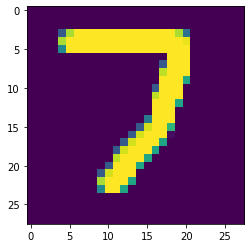

2


In [33]:
predicthandwritten("7.png")